# **Author Name**: Vangari Prashanth
# **Student Id**: 11645119

# TASK 1

In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [282]:
def getData(filename):
  canData=[] #List to store CAN data
  f = open(filename)
  #read_file = reader(f)
  read_file =f.readlines()

  #file = list(read_file)
  speed = []
  rpm = []
  i = 0
  for row in read_file:
    #Change the positions of the values if needed
    record = {'stamp':row[1:18], 'PID':row[25:28], 'const1':row[29:33],
'change':row[33:41],'value':int(row[41:45], 16), 'value2':0 ,'attack':0}

    if record["PID"] == '254': #Processing of speed
      if record["value"] >= 4095:
        record["attack"] = 1
      record['value'] =  (record['value'] * 0.62137119) /100
      speed.append(record['value'])

    if record["PID"] == '115': #Processing of RPM
      if record["value"] >= 65535:
        record["attack"] = 1
      record['value'] =  (record['value'] * 2)
      rpm.append(record['value'])

    i = i+1
    canData.append(record)
    record={}

  f.close()
  return canData


In [283]:
def dict_to_df(dict):
  #load dictionary to dataframe
  df = pd.DataFrame.from_dict(dict)
  df = df.reset_index(drop=True)   # Dropping the Column Attack
  df_RPM = df.loc[(df['PID'] == '115')]
  df_Speed = df.loc[(df['PID'] == '254')]
  return df_RPM,df_Speed

In [284]:
#edit file name with file directory of downloaded log files
f_inj_RPM, f_inj_Speed = dict_to_df(getData("CAN Bus log - injection of FFF as the speed reading.log"))
r_inj_RPM, r_inj_Speed= dict_to_df(getData("CAN Bus log - injection of RPM readings.log"))
no_inj_RPM, no_inj_Speed = dict_to_df(getData("CAN bus log - no injection of messages.log"))

# TASK 2: K - Means Clustering

In [285]:
f_inj_RPM.drop(['attack'], axis = 1)
f_inj_Speed.drop(['attack'], axis = 1)
r_inj_RPM.drop(['attack'], axis = 1)
r_inj_Speed.drop(['attack'], axis = 1)
no_inj_RPM.drop(['attack'], axis = 1)
no_inj_Speed.drop(['attack'], axis = 1)

,stamp,PID,const1,change,value,value2
20,1522004165.996440,254,918F,D364239E,0.000000,0
55,1522004166.016375,254,918F,C364339E,0.000000,0
84,1522004166.036373,254,918F,B364439E,0.000000,0
124,1522004166.056434,254,918F,A364539E,0.000000,0
157,1522004166.076394,254,918F,9364639E,0.000000,0
...,...,...,...,...,...,...
23823,1522004180.036277,254,918F,D096039F,3.386473,0
23860,1522004180.055837,254,918F,D696139F,3.249771,0
23885,1522004180.075786,254,918F,D896239F,3.144138,0
23925,1522004180.096297,254,918F,D996339F,3.038505,0


In [286]:
f_inj_RPM.reset_index(drop=True, inplace=True)
f_inj_Speed.reset_index(drop=True, inplace=True)
r_inj_RPM.reset_index(drop=True, inplace=True)
r_inj_Speed.reset_index(drop=True, inplace=True)
no_inj_RPM.reset_index(drop=True, inplace=True)
no_inj_Speed.reset_index(drop=True, inplace=True)

In [287]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#1
f_inj_Speed[['stamp', 'value']] = scaler.fit_transform(f_inj_Speed[['stamp', 'value']])
f_inj_Speed_kmeans = KMeans(n_clusters=2)
f_inj_Speed_kmeans.fit(f_inj_Speed[['stamp','value']])
f_inj_Speed['KMeans'] = f_inj_Speed_kmeans.labels_
f_inj_Speed_kmeans_centroids = f_inj_Speed_kmeans.cluster_centers_
f_inj_Speed_centroid = np.array(f_inj_Speed_kmeans_centroids)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [288]:
#2
f_inj_RPM[['stamp', 'value']] = scaler.fit_transform(f_inj_RPM[['stamp', 'value']])
f_inj_RPM_kmeans = KMeans(n_clusters=2)
f_inj_RPM_kmeans.fit(f_inj_RPM[['stamp','value']])
f_inj_RPM['KMeans'] = f_inj_RPM_kmeans.labels_
f_inj_RPM_kmeans_centroids = f_inj_RPM_kmeans.cluster_centers_
f_inj_RPM_centroid = np.array(f_inj_RPM_kmeans_centroids)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [289]:
#3
r_inj_Speed[['stamp', 'value']] = scaler.fit_transform(r_inj_Speed[['stamp', 'value']])
r_inj_Speed_kmeans = KMeans(n_clusters=2)
r_inj_Speed_kmeans.fit(r_inj_Speed[['stamp','value']])
r_inj_Speed['KMeans'] = r_inj_Speed_kmeans.labels_
r_inj_Speed_kmeans_centroids = r_inj_Speed_kmeans.cluster_centers_
r_inj_Speed_centroid = np.array(r_inj_Speed_kmeans_centroids)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [290]:
#4
r_inj_RPM[['stamp', 'value']] = scaler.fit_transform(r_inj_RPM[['stamp', 'value']])
r_inj_RPM_kmeans = KMeans(n_clusters=2)
r_inj_RPM_kmeans.fit(r_inj_RPM[['stamp','value']])
r_inj_RPM['KMeans'] = r_inj_RPM_kmeans.labels_
r_inj_RPM_kmeans_centroids = r_inj_RPM_kmeans.cluster_centers_
r_inj_RPM_centroid = np.array(r_inj_RPM_kmeans_centroids)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [291]:
#5
no_inj_Speed[['stamp', 'value']] = scaler.fit_transform(no_inj_Speed[['stamp', 'value']])
no_inj_Speed_kmeans = KMeans(n_clusters=2)
no_inj_Speed_kmeans.fit(no_inj_Speed[['stamp','value']])
no_inj_Speed['KMeans'] = no_inj_Speed_kmeans.labels_
no_inj_Speed_kmeans_centroids = no_inj_Speed_kmeans.cluster_centers_
no_inj_Speed_centroid = np.array(no_inj_Speed_kmeans_centroids)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [292]:
#6
no_inj_RPM[['stamp', 'value']] = scaler.fit_transform(no_inj_RPM[['stamp', 'value']])
no_inj_RPM_kmeans = KMeans(n_clusters=2)
no_inj_RPM_kmeans.fit(no_inj_RPM[['stamp','value']])
no_inj_RPM['KMeans'] = no_inj_RPM_kmeans.labels_
no_inj_RPM_kmeans_centroids = no_inj_RPM_kmeans.cluster_centers_
no_inj_RPM_centroid = np.array(no_inj_RPM_kmeans_centroids)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [293]:
# printing the centroids
print("f_inj_Speed_centroid:",f_inj_Speed_centroid)
print("f_inj_RPM_centroid:",f_inj_RPM_centroid)
print("r_inj_Speed_centroid:",r_inj_Speed_centroid)
print("r_inj_RPM_centroid:",r_inj_RPM_centroid)
print("no_inj_Speed_centroid:",no_inj_Speed_centroid)
print("no_inj_RPM_centroid:",no_inj_RPM_centroid)

f_inj_Speed_centroid: [[ 0.0147652   0.50089906]
 [-0.05743875 -1.94856666]]
f_inj_RPM_centroid: [[-0.86156837  0.61731336]
 [ 0.8489947  -0.60830435]]
r_inj_Speed_centroid: [[ 0.95305006  1.0487455 ]
 [-0.77899649 -0.85721514]]
r_inj_RPM_centroid: [[ 0.10991432  0.64166953]
 [-0.26694906 -1.55842462]]
no_inj_Speed_centroid: [[-1.185739   -0.93419799]
 [ 0.54632192  0.43042593]]
no_inj_RPM_centroid: [[ 1.1050571  -0.95013065]
 [-0.62699574  0.53909243]]


# **Compare the graphs for speed**

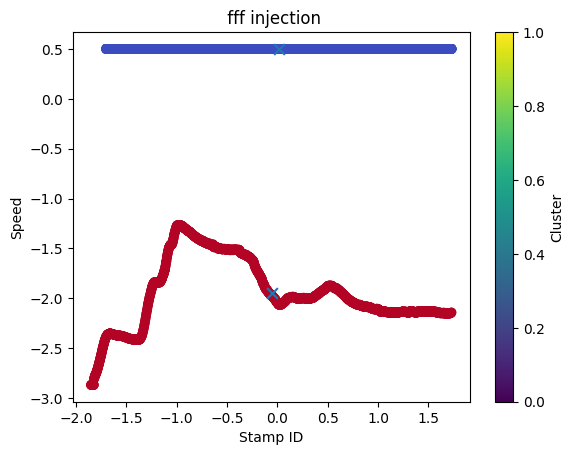

In [294]:
plt.scatter(x=f_inj_Speed['stamp'],y=f_inj_Speed['value'],c=f_inj_Speed['KMeans'],cmap='coolwarm')
plt.scatter(x=np.array(f_inj_Speed_centroid[:,0]),y=np.array(f_inj_Speed_centroid[:,1]),s = 60,marker="x")
plt.xlabel("Stamp ID")
plt.ylabel("Speed")
plt.title(" fff injection")
plt.colorbar(label='Cluster')
plt.show()

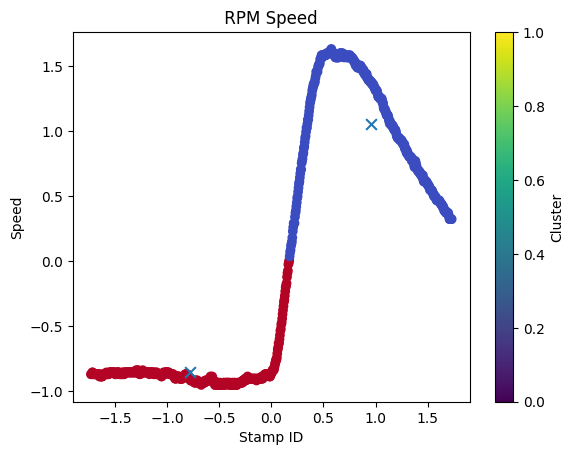

In [295]:
plt.scatter(x=r_inj_Speed['stamp'],y=r_inj_Speed['value'],c=r_inj_Speed['KMeans'],cmap='coolwarm')
plt.scatter(x=np.array(r_inj_Speed_centroid[:,0]),y=np.array(r_inj_Speed_centroid[:,1]),s = 60,marker="x")
plt.xlabel("Stamp ID")
plt.ylabel("Speed")
plt.title(" RPM Speed ")
plt.colorbar(label='Cluster')

plt.show()

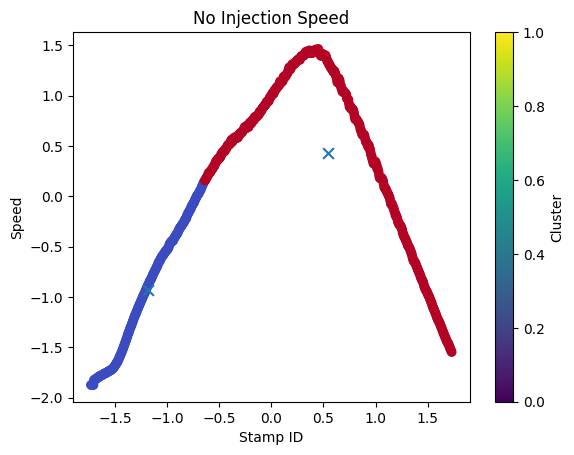

In [296]:
plt.scatter(x=no_inj_Speed['stamp'], y=no_inj_Speed['value'], c=no_inj_Speed['KMeans'], cmap='coolwarm')
plt.scatter(x=np.array(no_inj_Speed_centroid[:,0]), y=np.array(no_inj_Speed_centroid[:,1]), s=60, marker="x")
plt.xlabel("Stamp ID")
plt.ylabel("Speed")
plt.title("No Injection Speed")
plt.colorbar(label='Cluster')
plt.show()

# **Compare the plots for RPM**

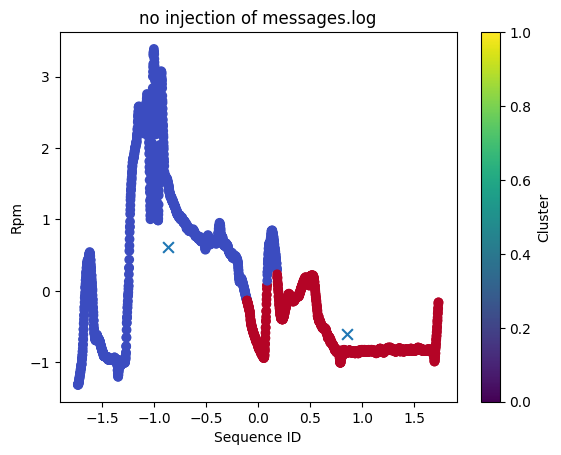

In [297]:
plt.scatter(x=f_inj_RPM['stamp'],y=f_inj_RPM['value'],c=f_inj_RPM['KMeans'],cmap='coolwarm')
plt.scatter(x=np.array(f_inj_RPM_centroid[:,0]),y=np.array(f_inj_RPM_centroid[:,1]),s = 60,marker="x")
plt.xlabel("Sequence ID")
plt.ylabel("Rpm")
plt.colorbar(label='Cluster')
plt.title("no injection of messages.log")
plt.show()

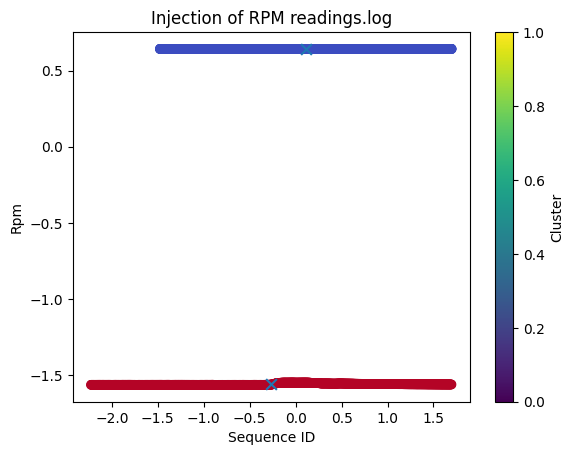

In [298]:
plt.scatter(x=r_inj_RPM['stamp'],y=r_inj_RPM['value'],c=r_inj_RPM['KMeans'],cmap='coolwarm')
plt.scatter(x=np.array(r_inj_RPM_centroid[:,0]),y=np.array(r_inj_RPM_centroid[:,1]),s = 60,marker="x")
plt.xlabel("Sequence ID")
plt.ylabel("Rpm")
plt.colorbar(label='Cluster')
plt.title("Injection of RPM readings.log")
plt.show()

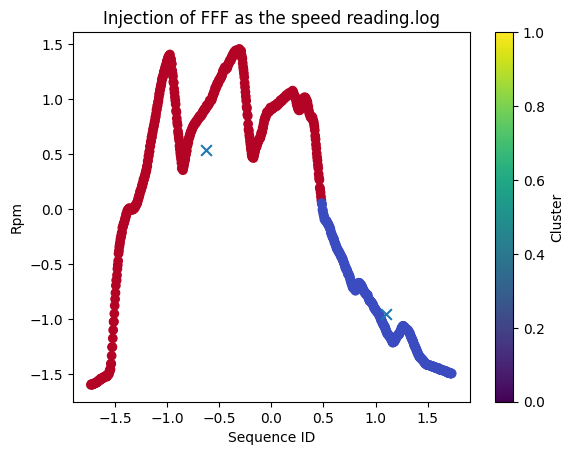

In [299]:
plt.scatter(x=no_inj_RPM['stamp'],y=no_inj_RPM['value'],c=no_inj_RPM['KMeans'],cmap='coolwarm')
plt.scatter(x=np.array(no_inj_RPM_centroid[:,0]),y=np.array(no_inj_RPM_centroid[:,1]),s = 60,marker="x")
plt.xlabel("Sequence ID")
plt.ylabel("Rpm")
plt.colorbar(label='Cluster')
plt.title("Injection of FFF as the speed reading.log")
plt.show()


# TASK 3


In [300]:
from sklearn.ensemble import IsolationForest
import seaborn as sns
import math

In [301]:
IF_f_inj_Speed = IsolationForest(contamination=0.5)
IF_f_inj_Speed.fit(f_inj_Speed[['value']])
IF_r_inj_Speed = IsolationForest(contamination=0.5)
IF_r_inj_Speed.fit(r_inj_Speed[['value']])
IF_no_inj_Speed = IsolationForest(contamination=0.5)
IF_no_inj_Speed.fit(no_inj_Speed[['value']])
IF_f_inj_RPM = IsolationForest(contamination=0.5)
IF_f_inj_RPM.fit(f_inj_RPM[['value']])
IF_r_inj_RPM = IsolationForest(contamination=0.5)
IF_r_inj_RPM.fit(r_inj_RPM[['value']])
IF_no_inj_RPM = IsolationForest(contamination=0.5)
IF_no_inj_RPM.fit(no_inj_RPM[['value']])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names,

IsolationForest(contamination=0.5)

In [302]:
f_inj_Speed['scores'] = IF_f_inj_Speed.decision_function(f_inj_Speed[['value']])
f_inj_Speed['anomaly'] = IF_f_inj_Speed.predict(f_inj_Speed[['value']])
r_inj_Speed['scores'] = IF_r_inj_Speed.decision_function(r_inj_Speed[['value']])
r_inj_Speed['anomaly'] = IF_r_inj_Speed.predict(r_inj_Speed[['value']])
no_inj_Speed['scores'] = IF_no_inj_Speed.decision_function(no_inj_Speed[['value']])
no_inj_Speed['anomaly'] = IF_no_inj_Speed.predict(no_inj_Speed[['value']])
f_inj_RPM['scores'] = IF_f_inj_RPM.decision_function(f_inj_RPM[['value']])
f_inj_RPM['anomaly'] = IF_f_inj_RPM.predict(f_inj_RPM[['value']])
r_inj_RPM['scores'] = IF_r_inj_RPM.decision_function(r_inj_RPM[['value']])
r_inj_RPM['anomaly'] = IF_r_inj_RPM.predict(r_inj_RPM[['value']])
no_inj_RPM['scores'] = IF_no_inj_RPM.decision_function(no_inj_RPM[['value']])
no_inj_RPM['anomaly'] = IF_no_inj_RPM.predict(no_inj_RPM[['value']])

Comparing graph for Speed

Text(0.5, 1.0, 'no injection of messages.log')

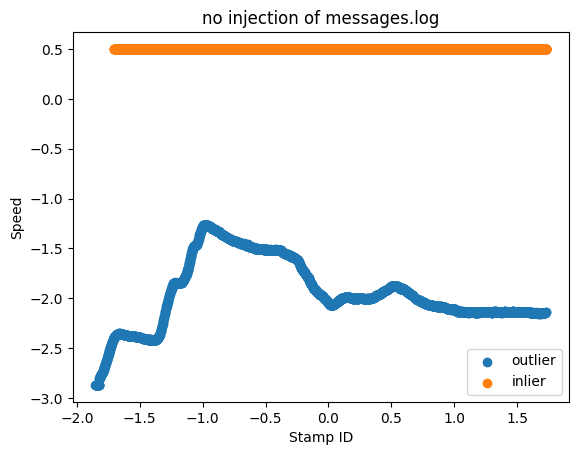

In [303]:
# Plotting the graph NO injection as the speed reading.log and speed data
plt.scatter(data=f_inj_Speed.loc[f_inj_Speed['anomaly']==-1],x="stamp",y="value")
plt.scatter(data=f_inj_Speed.loc[f_inj_Speed['anomaly']==1],x="stamp",y="value")
plt.legend(["outlier","inlier"])
plt.xlabel("Stamp ID")
plt.ylabel("Speed")
plt.title("no injection of messages.log")

Text(0.5, 1.0, 'injection of RPM readings.log')

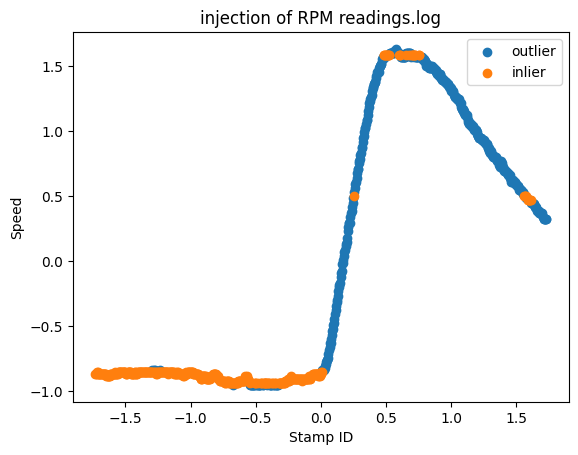

In [304]:
# Plotting the graph RPM injection as the speed reading.log and speed data
plt.scatter(data=r_inj_Speed.loc[r_inj_Speed['anomaly']==-1],x="stamp",y="value")
plt.scatter(data=r_inj_Speed.loc[r_inj_Speed['anomaly']==1],x="stamp",y="value")
plt.legend(["outlier","inlier"])
plt.xlabel("Stamp ID")
plt.ylabel("Speed")
plt.title("injection of RPM readings.log")

Text(0.5, 1.0, ' FFF injection in the speed reading.log')

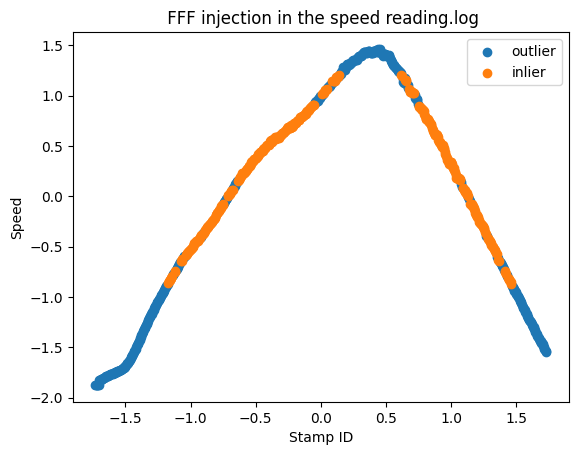

In [305]:
# Plotting the graph FFF injection as the speed reading.log and speed data
plt.scatter(data=no_inj_Speed.loc[no_inj_Speed['anomaly']==-1],x="stamp",y="value")
plt.scatter(data=no_inj_Speed.loc[no_inj_Speed['anomaly']==1],x="stamp",y="value")
plt.legend(["outlier","inlier"])
plt.xlabel("Stamp ID")
plt.ylabel("Speed")
plt.title(" FFF injection in the speed reading.log")

Comparing the graphs for RPM

Text(0.5, 1.0, ' no injection in messages.log')

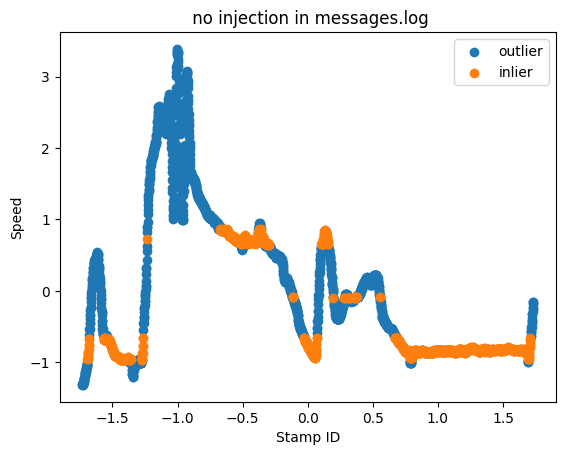

In [306]:
# Plotting the graph for NO Injection
plt.scatter(data=f_inj_RPM.loc[f_inj_RPM['anomaly']==-1],x="stamp",y="value")
plt.scatter(data=f_inj_RPM.loc[f_inj_RPM['anomaly']==1],x="stamp",y="value")
plt.legend(["outlier","inlier"])
plt.xlabel("Stamp ID")
plt.ylabel("Speed")
plt.title(" no injection in messages.log")

Text(0.5, 1.0, 'RPM injection readings.log')

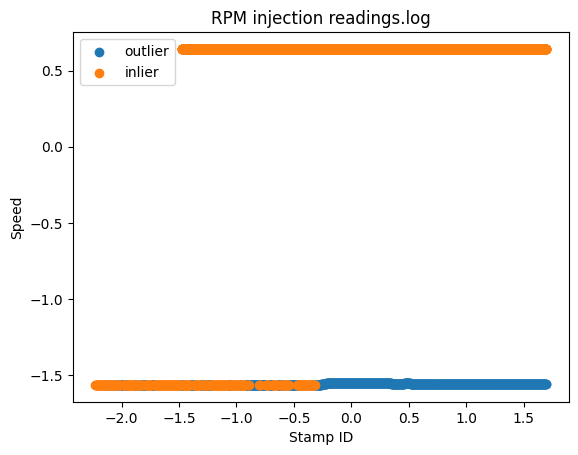

In [307]:
# Plotting the graph for RPM Injection
plt.scatter(data=r_inj_RPM.loc[r_inj_RPM['anomaly']==-1],x="stamp",y="value")
plt.scatter(data=r_inj_RPM.loc[r_inj_RPM['anomaly']==1],x="stamp",y="value")
plt.legend(["outlier","inlier"])
plt.xlabel("Stamp ID")
plt.ylabel("Speed")
plt.title("RPM injection readings.log")

Text(0.5, 1.0, 'FFF injection of speed in reading.log')

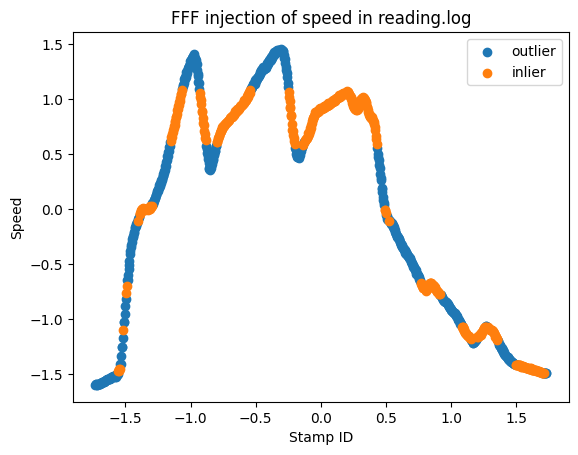

In [308]:
# Plotting the graph for FFF Injection
plt.scatter(data=no_inj_RPM.loc[no_inj_RPM['anomaly']==-1],x="stamp",y="value")
plt.scatter(data=no_inj_RPM.loc[no_inj_RPM['anomaly']==1],x="stamp",y="value")
plt.legend(["outlier","inlier"])
plt.xlabel("Stamp ID")
plt.ylabel("Speed")
plt.title("FFF injection of speed in reading.log")


# TASK 4 - Hidden Markov

In [309]:
!pip install hmmlearn

In [310]:
from hmmlearn.hmm import GaussianHMM
from sklearn.metrics import accuracy_score

In [313]:
def HMModel(data):
  hMmodel = GaussianHMM(n_components=2, random_state=42)
  dataframe_ = np.array(data["value"]).reshape(-1,1)
  hMmodel.fit(dataframe_)
  output = list(hMmodel.predict(dataframe_))
  print("Actual Value:", list(data['attack']))
  print("Predicted Value:", output)
  print("Accuracy:", accuracy_score(list(data['attack']), output))

In [314]:
# Hidden Markov Model for fff Injection, RPM
HMModel(f_inj_RPM)

Actual Value: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [315]:
# Hidden Markov Model for fff Injection, Speed
HMModel(f_inj_Speed)

Actual Value: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1

In [316]:
# Hidden Markov Model for RPM Injection, RPM
HMModel(r_inj_RPM)

Actual Value: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1

In [317]:
# Hidden Markov Model for RPM Injection, Speed
HMModel(r_inj_Speed)

Actual Value: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [318]:
# Hidden Markov Model for NO Injection RPM
HMModel(no_inj_RPM)

Actual Value: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [319]:
# Hidden Markov Model for NO Injection Speed
HMModel(no_inj_Speed)

Actual Value: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

# Task 5

1. What were the shortcomings/limitations of using unsupervised ML on this problem?

Unsupervised learning( K-means and Isolation Forest) has several limitations.

a. In unsupervised learning, the labeled data is not present which makes model peformance evaluation challenging.
b. The assumption that similar data points should belong to the same cluster may not be true in the complex datasets.
c. In K-means, K value should be chosen very correctly. Else, if the k value is not chosen correctly the entire model may not give accurate results.

2. What could be done to make the models perform better?
Dimensionality reduction techniques like PCA can be applied before clustering to improve the accuracy of the model. Using multiple clustering algorithms and ensemble methods can also improve the results. Also, employing feature engineering techniques helps in creating more meaningful features.

3. What do you suggest doing to solve the problem?
I would suggest that refining data pre-processing methods are helpful, to ensure that the data is properly cleaned and prepared. Trying out various clustering algorithms and optimizing their parameters can help in achieving more accurate results. For unsupervised learning, visualizations and exploratory data analysis are important to understand the nature of the data. Finally, trying out the different models, tuning parameters, and comparing results with the other models can help in increasing the accuracy.